In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
x,y=make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [3]:
df=pd.DataFrame(x,columns=['col1','col2','col3','col4','col5'])
df['target']=y
print(df.shape)

(100, 6)


In [4]:
df.head()

,col1,col2,col3,col4,col5,target
0,-0.915500,-3.369241,-1.961840,2.653273,-1.140265,1
1,0.030236,0.715596,2.499652,0.118751,-1.860413,0
2,-0.832656,-0.623371,0.947551,-1.729447,-1.178022,0
3,-0.652630,-3.064145,-1.504069,1.649630,-0.186355,1
4,0.032817,-3.066130,-0.773424,2.237334,-0.518666,1


In [8]:
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [9]:
import random

In [10]:
def sample_features(df,percent):
    cols=random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [ ]:
def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

In [13]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\Gargi\AppData\Local\Temp\ipykernel_38244\3315341656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [14]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\Gargi\AppData\Local\Temp\ipykernel_38244\3315341656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [15]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\Gargi\AppData\Local\Temp\ipykernel_38244\3315341656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [16]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col4', 'target'], dtype='object')
Index(['col2', 'col1', 'target'], dtype='object')
Index(['col4', 'col1', 'target'], dtype='object')


In [17]:
df3

,col4,col1,target
97,0.785538,-2.553980,1
17,-2.271716,-1.315506,0
58,-1.009391,-0.978711,0
9,-0.222106,-1.432702,0
54,-1.283054,-0.790058,0
63,0.250818,-0.702200,1
78,0.248177,-0.048352,0
54,-1.283054,-0.790058,0
10,-0.944972,-1.638729,0
20,-2.801507,-1.468158,0


In [18]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [19]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [20]:
from sklearn.tree import plot_tree

[Text(0.4, 0.875, 'x[1] <= -0.22\ngini = 0.493\nsamples = 50\nvalue = [28, 22]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.6, 0.625, 'x[1] <= 0.249\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.4, 0.375, 'x[0] <= -0.21\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]')]

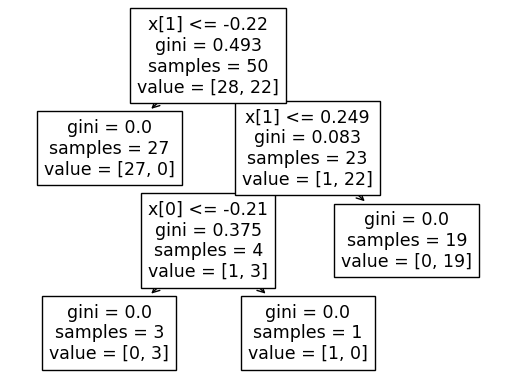

In [21]:
plot_tree(clf1)

[Text(0.5714285714285714, 0.9705882352941176, 'x[1] <= -2.957\ngini = 0.487\nsamples = 50\nvalue = [29, 21]'),
 Text(0.42857142857142855, 0.9117647058823529, 'x[0] <= -2.878\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.35714285714285715, 0.8529411764705882, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.8529411764705882, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7142857142857143, 0.9117647058823529, 'x[1] <= -2.395\ngini = 0.47\nsamples = 45\nvalue = [28, 17]'),
 Text(0.6428571428571429, 0.8529411764705882, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.7857142857142857, 0.8529411764705882, 'x[1] <= -2.039\ngini = 0.489\nsamples = 40\nvalue = [23, 17]'),
 Text(0.7142857142857143, 0.7941176470588235, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8571428571428571, 0.7941176470588235, 'x[0] <= 1.713\ngini = 0.461\nsamples = 36\nvalue = [23, 13]'),
 Text(0.7857142857142857, 0.7352941176470589, 'x[0] <= 0.618\ngini = 0.451\nsamples = 35\nvalue = [23, 1

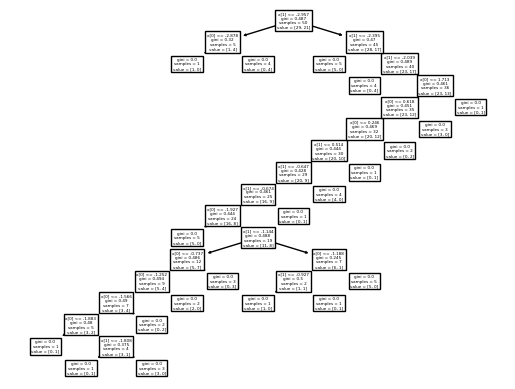

In [22]:
plot_tree(clf2)

[Text(0.6, 0.875, 'x[0] <= 0.249\ngini = 0.487\nsamples = 50\nvalue = [29, 21]'),
 Text(0.4, 0.625, 'x[1] <= 0.256\ngini = 0.121\nsamples = 31\nvalue = [29, 2]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.6, 0.375, 'x[1] <= 0.443\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]')]

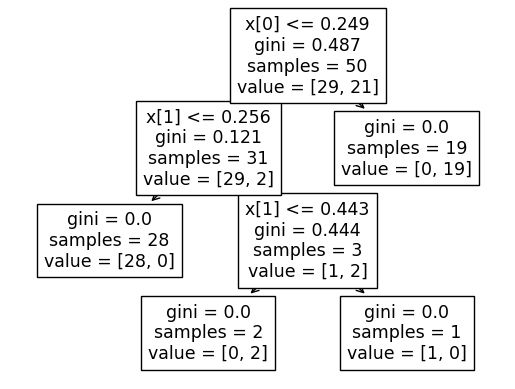

In [23]:
plot_tree(clf3)

In [31]:
clf1.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

c:\Users\Gargi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [30]:
clf2.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

c:\Users\Gargi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [29]:
clf3.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

c:\Users\Gargi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

,col1,col2,col3,col4,col5,target
44,0.127016,-3.646785,-2.192050,1.948066,-2.141183,1
9,-1.432702,0.260692,1.998623,-0.222106,-1.116220,0
17,-1.315506,-1.610133,-1.500173,-2.271716,0.024380,0
99,-0.414088,-0.098447,1.543061,-0.592363,-1.619019,0
46,1.198885,1.390918,1.819527,0.169523,-1.126295,0
88,-0.695992,-0.402990,4.365811,-0.379803,-3.812153,0
98,0.266821,1.262706,0.940584,-1.109958,1.587494,1
27,0.009654,1.468655,0.606388,-0.407162,0.659417,1
30,-1.230490,-1.030653,1.000717,-0.986372,-0.785736,0
81,0.245785,0.178153,1.821217,-0.388971,-1.849183,0
